In [2]:
import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import os
import pysiaf
import sys
import webbpsf
from hydra import initialize, compose
from pprint import pprint
from pysiaf.utils.rotations import attitude

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo, pandeia_input, psf, gs

In [47]:
# Read in the Roman SIAF
rsiaf = pysiaf.Siaf('Roman')

# Plot the Roman apertures on the telescope ("V") frame
aperture_labels = [f'WFI{i + 1:02}_FULL' for i in range(18)]
roman_apertures = [rsiaf[rap] for rap in aperture_labels]
# roman_apertures.append('CGI_CEN')

labels = [f'SCA{str(i + 1).zfill(2)}' for i in range(18)]

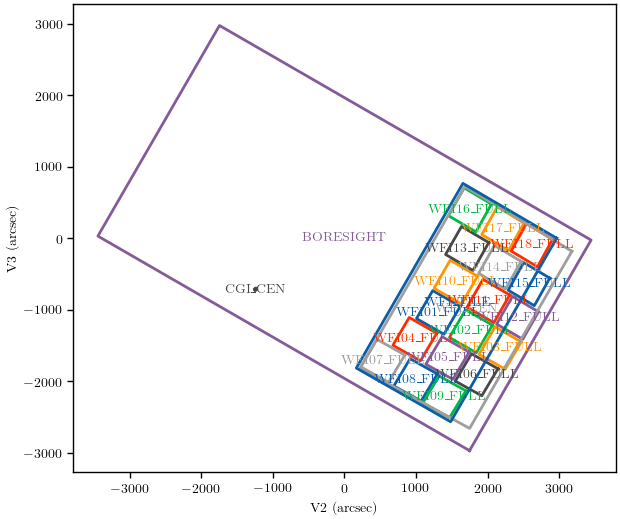

In [37]:
f, ax = plt.subplots(figsize=(7, 7))

rsiaf.plot(label=True)

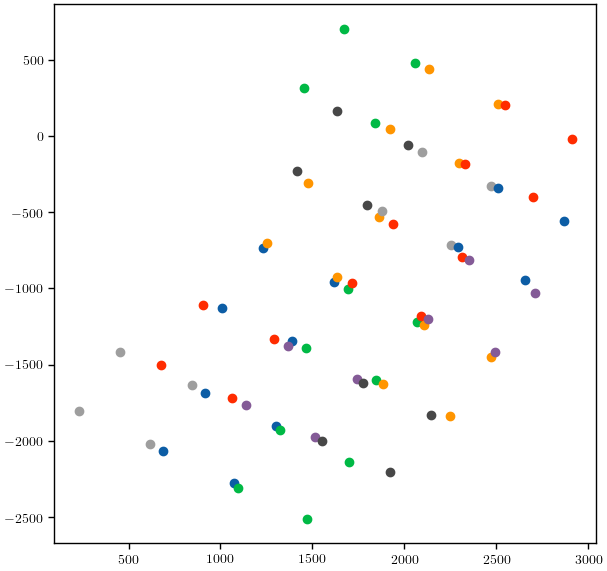

In [53]:
f, ax = plt.subplots(figsize=(7, 7))

for ap in roman_apertures:
    tel_x, tel_y = ap.corners('tel')
    # sci_x, sci_y = ap.tel_to_sci(tel_x, tel_y)
    ax.plot(tel_x, tel_y, 'o')